In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# example = ["8S95"]
csv_dir = Path("distributions")

gt_data = pd.read_csv(csv_dir / "gt_8S95.csv", names=['pair', 'count_gt'])
grapha_data = pd.read_csv(csv_dir / "graphafold_casp_8S95.csv", names=['pair', 'count_grapha'])
ufold_data = pd.read_csv(csv_dir / "ufold_8S95.csv", names=['pair', 'count_ufold'])
spotrna_data = pd.read_csv(csv_dir / "spotrna_8S95.csv", names=['pair', 'count_spotrna'])
sincfold_data = pd.read_csv(csv_dir / "sincfold_8S95.csv", names=['pair', 'count_sincfold'])
# join dfs on pair column, fill missing values with 0
# df = pd.merge(gt_data, grapha_data, on='pair', suffixes=('_gt', '_grapha'), how='outer').fillna(0)
df = pd.merge(gt_data, grapha_data, on='pair', suffixes=("_gt", "_grapha"), how='outer').fillna(0)
df = pd.merge(df, ufold_data, on='pair', suffixes=('', "_ufold"), how="outer").fillna(0)
df = pd.merge(df, spotrna_data, on='pair', suffixes=('', "_spotrna"), how='outer').fillna(0)
df = pd.merge(df, sincfold_data, on='pair', suffixes=('', "_sincfold"), how='outer').fillna(0)

In [4]:
df

,pair,count_gt,count_grapha,count_ufold,count_spotrna,count_sincfold
0,A-A,2,2.0,0.0,1.0,0.0
1,A-C,1,3.0,0.0,0.0,0.0
2,A-G,2,2.0,0.0,1.0,0.0
3,A-U,4,4.0,0.0,0.0,0.0
4,C-C,1,1.0,0.0,0.0,0.0
5,C-G,2,2.0,0.0,0.0,0.0
6,C-U,1,1.0,0.0,0.0,0.0
7,G-G,2,0.0,0.0,0.0,0.0
8,G-U,2,3.0,5.0,1.0,3.0
9,U-U,1,2.0,0.0,0.0,0.0


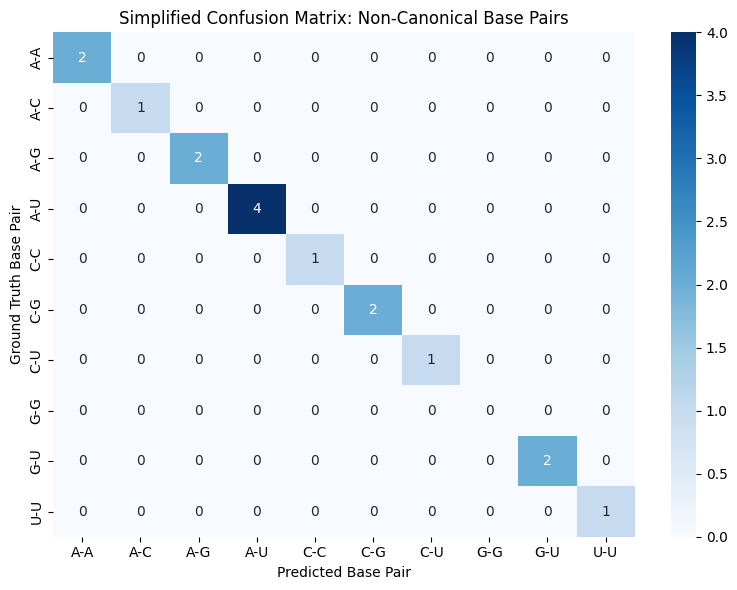

In [24]:
# Create a matrix (GT as rows, Pred as columns)
all_pairs = sorted(df["pair"].unique())
conf_matrix = pd.DataFrame(0, index=all_pairs, columns=all_pairs)

# Fill diagonal values as min(count_gt, count_pred)
for _, row in df.iterrows():
    pair = row["pair"]
    match = min(row["count_gt"], row["count_pred"])
    conf_matrix.loc[pair, pair] = match

# Fill off-diagonal (missed or excess) if desired – here we just leave them zero
# You could extend this with real misclassification info if available

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Simplified Confusion Matrix: Non-Canonical Base Pairs")
plt.xlabel("Predicted Base Pair")
plt.ylabel("Ground Truth Base Pair")
plt.tight_layout()
plt.show()

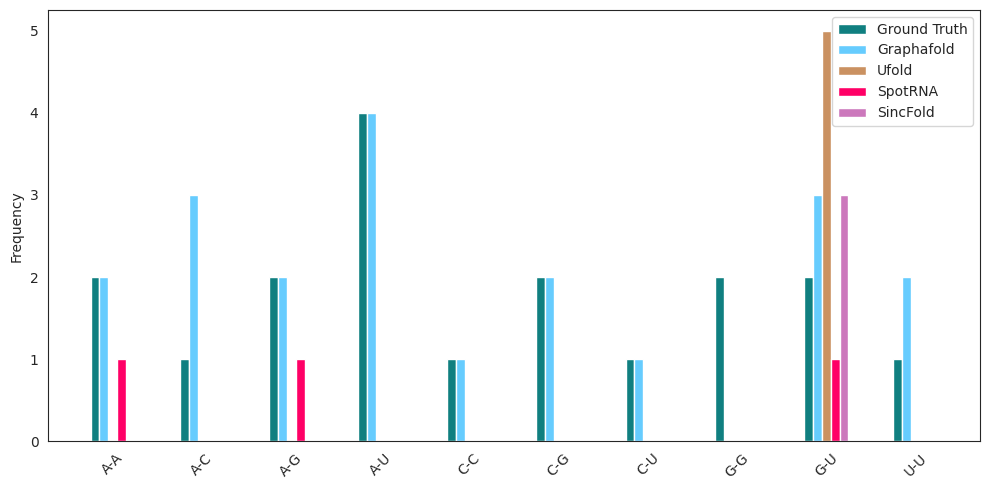

In [39]:
sns.set_style("white")
colors = sns.color_palette("colorblind")

x = range(len(df))
plt.figure(figsize=(10, 5))
width = 0.1
plt.bar(x, df['count_gt'], width=width, label='Ground Truth', color="#107F80") # colors[2]
plt.bar([i + width for i in x], df['count_grapha'], width=width, label='Graphafold', color="#66CCFE")
plt.bar([i + 2 * width for i in x], df['count_ufold'], width=width, label='Ufold', color=colors[-5])
plt.bar([i + 3 * width for i in x], df['count_spotrna'], width=width, label='SpotRNA', color="#FF0066")
plt.bar([i + 4 * width for i in x], df['count_sincfold'], width=width, label='SincFold', color=colors[4])
plt.xticks([i + 2 * width for i in x], df['pair'], rotation=45)
plt.ylabel('Frequency')
# plt.title('Non-Canonical Base Pair Frequencies: Ground Truth vs Prediction')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# zielony: #107F80 
# niebieski: #66CCFE 
# różowy: #FF0066